# Load and Inspect Tg Dataset

This notebook loads the raw polymer Tg dataset and inspects its basic structure,
including dataset size and column names.

In [4]:
import pandas as pd

In [14]:
df = pd.read_csv("../data/raw/tg_dataset.csv")

In [6]:
df.shape

(7284, 4)

In [7]:
df.columns

Index(['SMILES', 'Tg', 'PID', 'Polymer Class'], dtype='object')

In [8]:
print(df.shape)
print(df.columns)

(7284, 4)
Index(['SMILES', 'Tg', 'PID', 'Polymer Class'], dtype='object')


In [9]:
missing_summary = df.isnull().sum()
print(missing_summary)

SMILES           0
Tg               0
PID              0
Polymer Class    0
dtype: int64


In [10]:
print(df["Tg"].describe())

count    7284.000000
mean      140.190628
std       112.961182
min      -139.000000
25%        53.112500
50%       132.000000
75%       230.000000
max       495.000000
Name: Tg, dtype: float64


In [11]:
duplicate_count = df["SMILES"].duplicated().sum()
print(f"Duplicate SMILES: {duplicate_count}")

Duplicate SMILES: 110


In [12]:
duplicate_rows = df[df["SMILES"].duplicated(keep=False)]
duplicate_rows

,SMILES,Tg,PID,Polymer Class
0,*C*,-54.000000,P010001,Polyolefins
30,*/C=C/CCC*,-99.600000,P010068,Polydienes
31,*/C=C/CCC*,-99.600000,P010082,Polydienes
32,*/C=C/CCC*,-99.600000,P010098,Polydienes
33,*/C=C/CC*,-69.000000,P010070,Polydienes
...,...,...,...,...
7231,*/C=C/c1cc(OCCCCCC)c(*)cc1OC,60.000000,P512152,Polyphenylenes
7251,*/C=C/c1cc(OCCCCCC)c(*)cc1OC,60.000000,P512089,Polyphenylenes
7252,*/C=C/c1cc(OCCCCCC)c(*)cc1OC,60.000000,P512152,Polyphenylenes
7282,*/C=C/*,332.708838,P014362,Polydienes


### Observations
- 7284 data entry, 4 columns
- No missing values.
- 110 duplicated SMILES entries were identified.

In [13]:
tg = df["Tg"].dropna()

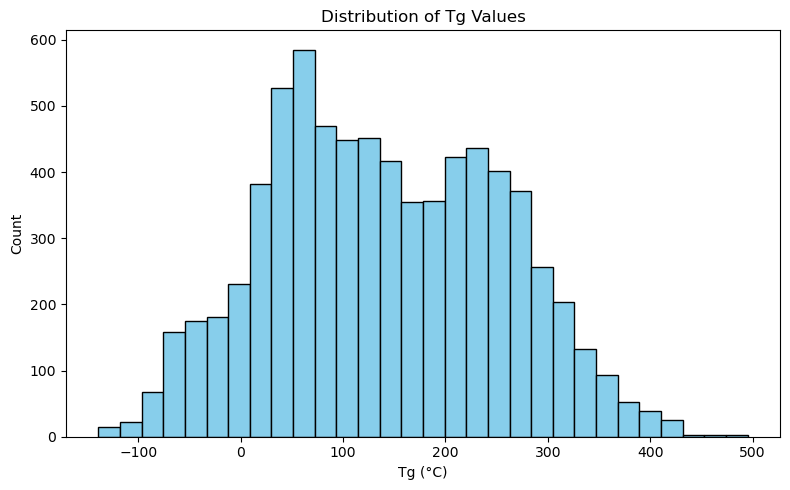

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(tg, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tg Values")
plt.xlabel("Tg (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../data/processed/tg_distribution.png")
plt.show()

### Tg Distribution

The histogram shows a broad distribution of glass transition temperatures,
with most values concentrated in the low to mid temperature range (0-300 degree C).
A small number of high-Tg outliers are observed, which may require
attention in later modeling steps.